In [0]:
%python
# read data 
query = "select * from train_dataset_csv1"
dataspark = spark.sql(query)
data = dataspark.toPandas()


In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import DataConversionWarning

In [0]:
data.describe()

Out[29]:

,Access_Level,Training_Completed,Code_postal,EmployeeTargeted,Gender,Social_Media,behaviorPattern2,peerUsageMetric6,usageMetric2,usageMetric5,fraudTraining
count,10500,10257,10500,10500,10500,10317,10500,10500,10500,10500,10500
unique,8,2,6,2,2,7,8,7,8,8,2
top,2,1,10000,1,1,0,0,0,0,3,1
freq,2387,5161,3957,7689,5260,4619,4299,1544,4887,1365,5285


In [0]:
# format non reconnu automatiquement
data = data.apply(pd.to_numeric)

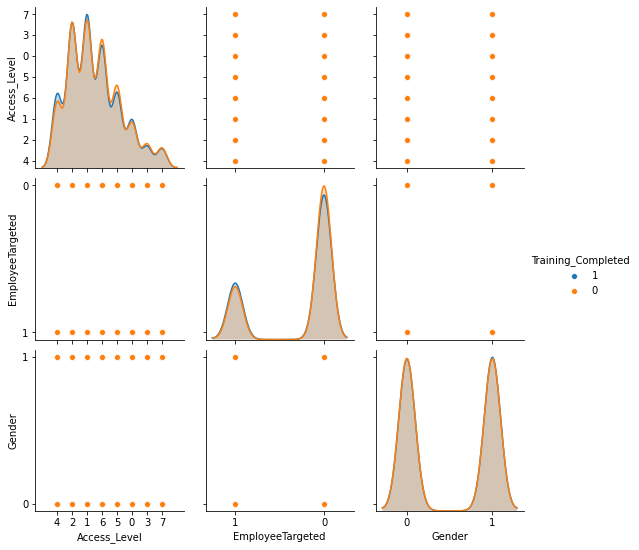

In [0]:
sns.pairplot(data, vars=['Access_Level', 'EmployeeTargeted', 'Gender'], hue='Training_Completed')
display() 

In [0]:
pd.crosstab(data["EmployeeTargeted"], data["Gender"])

Out[14]:

Gender,0,1
EmployeeTargeted,,
0,2112,699
1,3128,4561


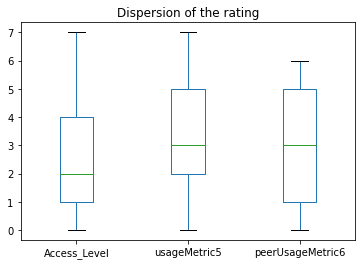

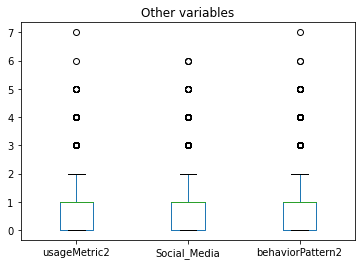

In [0]:
plt.figure(figsize=(10, 6))
f = plt.figure(1)
df = pd.DataFrame(data = data.filter(['Access_Level'  , 'usageMetric5' , 'peerUsageMetric6']))
df.plot(kind='box')
plt.title("Dispersion of the rating")
plt.figure(figsize=(10, 6))
f.show()

g = plt.figure(2)
df = pd.DataFrame(data = data.filter(['usageMetric2', 'Social_Media', 'behaviorPattern2']))
df.plot(kind='box')
plt.title("Other variables")
plt.figure(figsize=(3,4))
g.show()

In [0]:
data.head(5)

Out[20]:

,Access_Level,Training_Completed,Code_postal,EmployeeTargeted,Gender,Social_Media,behaviorPattern2,peerUsageMetric6,usageMetric2,usageMetric5,fraudTraining
0,4,1,10000,1,0,2,1,6,0,4,1
1,2,1,84995,0,0,1,0,5,1,6,1
2,2,1,10000,1,0,0,0,0,0,4,1
3,3,0,24999,1,1,0,2,6,0,6,0
4,2,1,24999,1,1,1,2,3,1,5,0


Out[41]:

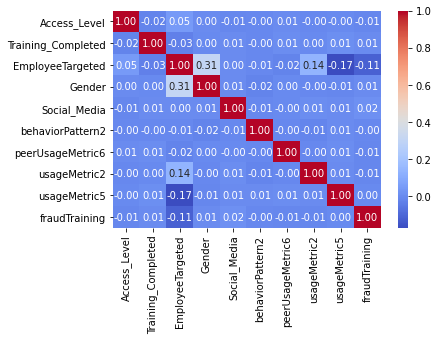

<matplotlib.axes._subplots.AxesSubplot at 0x7fe2585b14f0>

In [0]:
sns.heatmap(data.drop(columns=['Code_postal']).corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

In [0]:
data['usageMetric2'].value_counts(normalize=True)
pd.crosstab(data['usageMetric2'],data['EmployeeTargeted'],normalize=True)

Out[43]:

EmployeeTargeted,0,1
usageMetric2,,
0,0.150095,0.315333
1,0.089429,0.266762
2,0.023619,0.111524
3,0.003714,0.030476
4,0.000667,0.007238
5,0.000190,0.000762
6,0.000000,0.000095
7,0.000000,0.000095


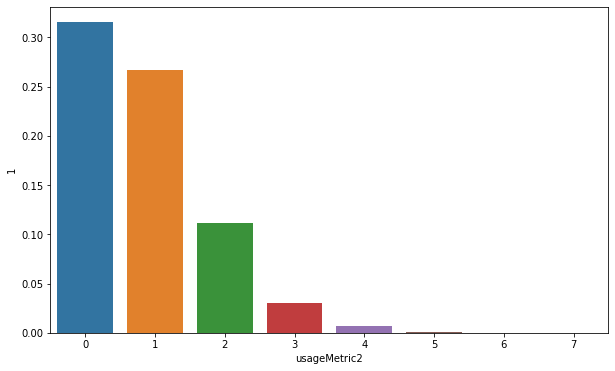

In [0]:
df = pd.crosstab(data['usageMetric2'],data['EmployeeTargeted'],normalize=True).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="usageMetric2",y=1.0, data=df)
plt.show()

In [0]:
# you should retransform in spark format
spark_df = spark.createDataFrame(data)
spark_df.write.mode("overwrite").saveAsTable("training_dataset_numeric")